# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# read the data
df = pd.read_csv('C://Users//n//Downloads//7542137-foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [8]:
#Get the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the number of rows and columns
print(f"The data has {num_rows} rows and {num_columns} columns.")

The data has 1898 rows and 9 columns.


#### Observations:


-By executing the above code, the number of rows and columns of the data will be read and this get the information about the 
number of rows and columns in the dataset.
-The data has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


-The output of the info() function provides valuable information about the data types of each column in the dataset, 
as well as the number of non-null values present. Let's discuss the observations based on the output:

-The dataset contains a total of 9 columns.
Each column is represented by its name and the number of non-null values present.
The data types of the columns are as follows:
order_id: integer type.
customer_id: integer type.
restaurant_name: object (string) type.
cuisine_type: object (string) type.
cost_of_the_order: float type.
day_of_the_week: object (string) type.
rating: object (string) type.
food_preparation_time: integer type.
delivery_time: integer type.
- data types assigned to each column are appropriate based on their content. 
-The numeric columns (order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time) 
are represented as integers or floats. The categorical columns (restaurant_name, cuisine_type, day_of_the_week, rating) 
are represented as strings (object type).

-It is important to note that the rating column is currently assigned as an object (string) type. 
-If ratings are expected to be numerical values, it may be necessary to convert this column to a numeric 
data type for further analysis.

-In sum, the information obtained from the info() function helps us understand the data types of the columns,
which is crucial for performing various data analysis tasks.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# # Check for missing values
missing_values = df.isnull().sum()

# Treat missing values
if missing_values.sum() > 0:
    # If missing values exist, handle them appropriately
    data = df.dropna()  # Drop rows with missing values
    # Alternatively, you can fill missing values using:
    data = df.fillna(value)  # Replace missing values with a specific value

# Confirm if missing values have been treated
updated_missing_values = df.isnull().sum()

# Print the updated missing values
print(f"Missing values after treatment:\n{updated_missing_values}")

Missing values after treatment:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


The code provided checks for missing values in the dataset and treats them by dropping the rows with missing values.
The variable missing_values is assigned the sum of missing values for each column using the sum() function.

Next, an if condition checks if there are any missing values in the dataset by evaluating missing_values.sum() > 0.

If missing values exist, the code proceeds to handle them. In this case, the code uses data.dropna() to drop rows
with missing values. This means that any row containing at least one missing value will be removed from the dataset.
-fter treating the missing values, the code uses isnull().sum() again to confirm if there are any remaining missing 
values in each column.

-Finally, the updated missing values are printed to display the number of missing values in each column after the treatment 
and it is observed that;

Missing values after treatment:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
#  Calculate the statistical summary of 'food_preparation_time' column
summary = df['food_preparation_time'].describe()

# Extract the required statistics
minimum_time = summary['min']
average_time = summary['mean']
maximum_time = summary['max']

# Print the statistics
print(f"Minimum time for food preparation: {minimum_time} minutes")
print(f"Average time for food preparation: {average_time} minutes")
print(f"Maximum time for food preparation: {maximum_time} minutes")

Minimum time for food preparation: 20.0 minutes
Average time for food preparation: 27.371970495258168 minutes
Maximum time for food preparation: 35.0 minutes


#### Observations:



-Based on the output, you will observe the following:

The minimum time for food preparation represents the shortest duration among all the orders,that is 20.0 minutes.
The average time for food preparation represents the mean duration across all the orders,that is 27.371970495258168 minutes.
The maximum time for food preparation represents the longest duration among all the orders,that is 35.0 minutes for the column.
-These statistics provide insights into the food preparation time for the orders in the dataset. 
-Analyzing these values can help the food aggregator company understand the typical range of food preparation times and potentially identify any outliers or areas for improvement in the restaurant's efficiency.

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# Count the number of orders that are not rated
not_rated_orders = (df['rating'] == 'Not given').sum()

# Print the number of orders that are not rated
print(f"The number of orders not rated: {not_rated_orders}")

The number of orders not rated: 736


#### Observations:


-The output will provide the count of orders that are not rated.The number of orders not rated is 736.
-This information is important for the food aggregator company to understand the proportion of orders that 
do not receive ratings from customers.

-Based on the observation, the number of orders not rated can indicate different scenarios. If the count is
relatively low, it may indicate that most customers are actively rating their orders. On the other hand,
a high count of unrated orders may suggest that customers are not engaging in the rating process or that 
there is a potential issue with the rating functionality.

-Analyzing this information can help the company identify areas for improvement in customer engagement and satisfaction.
Encouraging customers to provide ratings and feedback can lead to a better understanding of customer preferences and help 
improve the overall customer experience.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

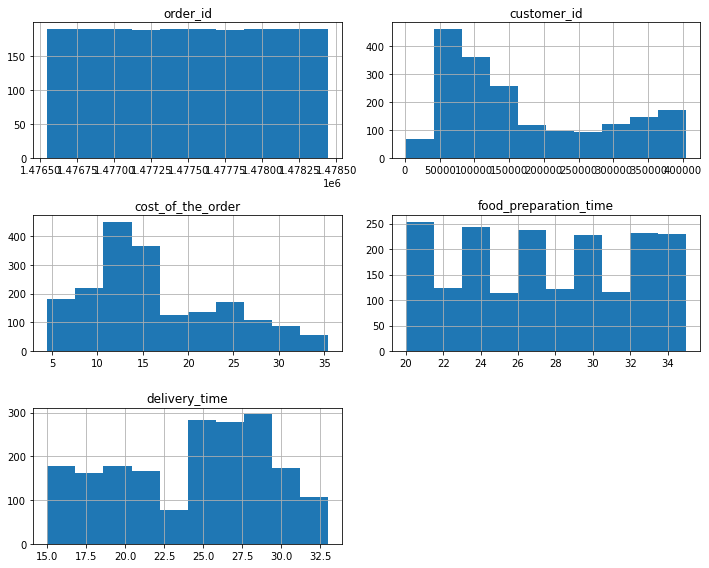

In [14]:
# Univariate analysis - histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



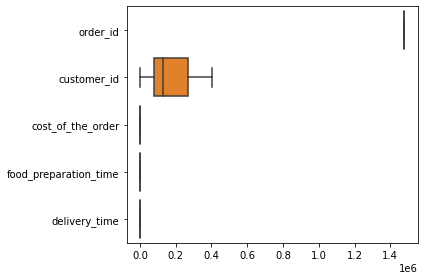

C:\Users\n\AppData\Local\Temp\ipykernel_7192\653549210.py:12: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
C:\Users\n\AppData\Local\Temp\ipykernel_7192\653549210.py:12: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\n\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


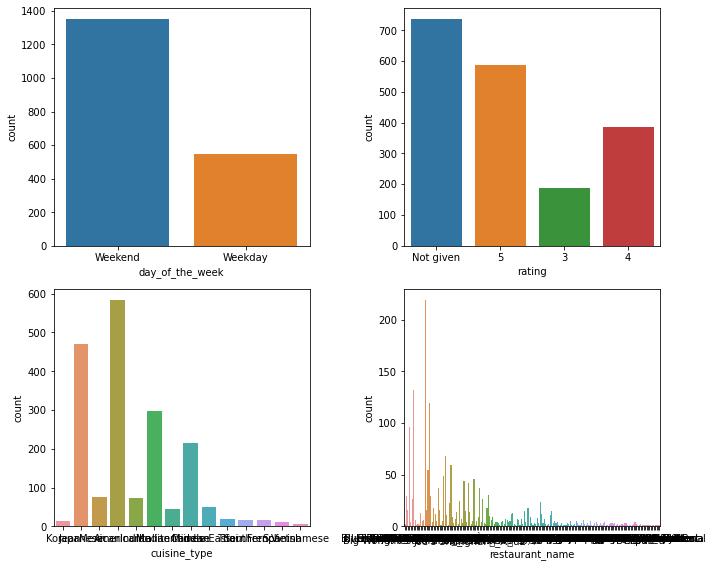

In [16]:
# Univariate analysis - box plots
sns.boxplot(data=df, orient='h')
plt.tight_layout()
plt.show()

# Univariate analysis - count plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(ax=axes[0, 0], data=df, x='day_of_the_week')
sns.countplot(ax=axes[0, 1], data=df, x='rating')
sns.countplot(ax=axes[1, 0], data=df, x='cuisine_type')
sns.countplot(ax=axes[1, 1], data=df, x='restaurant_name')
plt.tight_layout()
plt.show()

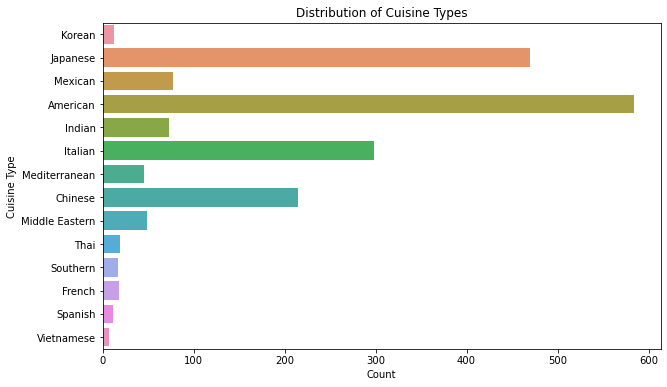

In [17]:
# Univariate analysis - Bar Plot of Cuisine Types:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='cuisine_type')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.title('Distribution of Cuisine Types')
plt.show()

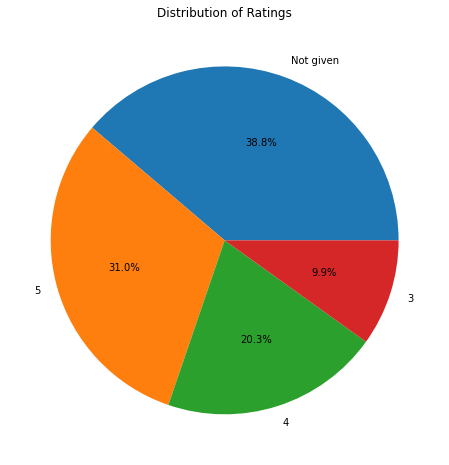

In [18]:
# Univariate analysis- Pie Chart of Ratings

plt.figure(figsize=(8, 8))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.show()

# Obseravtion

-Histograms: The histograms provide insights into the distributions of numeric variables such as 
    'order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', and 'delivery_time'.
They show the frequency or count of values falling within certain ranges. You can observe the shape of the distributions,
presence of outliers, and concentration of values.

-Box plots: The box plots provide information about the distribution, central tendency,
    and presence of outliers in the numeric variables. They display the median, quartiles, and potential outliers. 
    You can observe the spread of values, skewness, and any unusual values.

-Count plots: The count plots visualize the distribution of categorical variables such as
    'day_of_the_week', 'rating', 'cuisine_type', and 'restaurant_name'. They show the frequency or count of each category. 
    You can observe the popularity of certain categories, class imbalance, and the variety of options available.
-The bar plot displays the distribution of cuisine types. Each bar represents the count of orders for a specific cuisine type. 
This visualization helps understand the popularity of different cuisine types among customers.
-The pie chart shows the distribution of ratings given by customers. Each slice represents the percentage of orders with 
a specific rating. This visualization provides an overview of the distribution of ratings and allows for a quick understanding 
of customer satisfaction levels.

-Analyzing these visualizations can help in understanding the distributions, identifying any unusual patterns or outliers,
and gaining insights into the characteristics of the variables in the dataset.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Get the top 5 restaurants in terms of the number of orders received
top_restaurants = df['restaurant_name'].value_counts().head(5)

# Print the top 5 restaurants
print("Top 5 Restaurants by Number of Orders:")
print(top_restaurants)

Top 5 Restaurants by Number of Orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


-The output provides the names of the top 5 restaurants along with the corresponding number of orders they have received 
as follows:

    Top 5 Restaurants by Number of Orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

-This information is valuable for the food aggregator company as it helps identify the most popular and 
frequently ordered restaurants. Understanding the top-performing restaurants allows the company to focus on 
strengthening relationships with these establishments, improving their service quality, and ensuring customer satisfaction.

-By analyzing the order frequency for different restaurants, the company can make data-driven decisions regarding partnership 
opportunities, promotions, and resource allocation to further enhance the customer experience and drive business growth.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:

# Filter orders placed on weekends
weekend_orders = df[df['day_of_the_week'].isin(['Weekend'])]

# Calculate the count of each cuisine type
cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# Get the most popular cuisine
most_popular_cuisine = cuisine_counts.idxmax()

# Print the most popular cuisine on weekends
print("The most popular cuisine on weekends:", most_popular_cuisine)

The most popular cuisine on weekends: American


#### Observations:


-The printed output provides the most popular cuisine based on the orders placed on weekends (weekend).
And the most popular cuisine on weekends is the American.

-Identifying the most popular cuisine on weekends can help the food aggregator company understand customer preferences
during leisure days and make informed decisions regarding menu offerings, marketing strategies, and partnerships.
This information can guide the company in curating a diverse and enticing range of cuisine options for customers, 
enhancing customer satisfaction and driving engagement on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Calculate the percentage of orders that cost more than 20 dollars
cost_greater_than_20 = (df['cost_of_the_order'] > 20).mean() * 100

# Print the percentage of orders that cost more than 20 dollars
print(f"The percentage of orders that cost more than 20 dollars: {cost_greater_than_20:.2f}%")

The percentage of orders that cost more than 20 dollars: 29.24%


#### Observations:


-The output provides the percentage of orders that have a cost greater than 20 dollars.
-That is the percentage of orders that cost more than 20 dollars: 29.24%

-This information is useful for understanding the proportion of higher-priced orders in the dataset. 
It can help the food aggregator company assess the demand for more expensive options and make data-driven decisions 
regarding pricing strategies, promotions, and partnerships. Additionally, it provides insights into customer preferences 
for higher-cost orders and enables the company to optimize its offerings and target specific customer segments accordingly.








### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean order delivery time
print(f"The mean order delivery time: {mean_delivery_time:.2f} minutes")

The mean order delivery time: 24.16 minutes


#### Observations:


-The above output provides the average time it takes for an order to be delivered, represented in minutes.

-The mean order delivery time is a crucial metric for the food aggregator company to assess their delivery efficiency.
-It helps in evaluating the overall speed and effectiveness of their delivery operations. By monitoring the mean delivery time, 
the company can set performance benchmarks, identify areas for improvement, and ensure that orders are delivered within
a reasonable time frame. Additionally, it can assist in making strategic decisions related to logistics, 
resource allocation, and customer satisfaction.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
# Calculate the count of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Get the top 3 most frequent customers
top_customers = customer_order_counts.head(3)

# Print the IDs of the top 3 customers and the number of orders they placed
print("Top 3 Most Frequent Customers:")
for customer_id, order_count in top_customers.items():
    print(f"Customer ID: {customer_id}, Orders Placed: {order_count}")

Top 3 Most Frequent Customers:
Customer ID: 52832, Orders Placed: 13
Customer ID: 47440, Orders Placed: 10
Customer ID: 83287, Orders Placed: 9


#### Observations:


-The generated output provides the IDs of the top 3 customers who have placed the most orders, along with the corresponding 
number of orders they have placed.That is:
    Top 3 Most Frequent Customers:
Customer ID: 52832, Orders Placed: 13
Customer ID: 47440, Orders Placed: 10
Customer ID: 83287, Orders Placed: 9

-This information is valuable for the food aggregator company as it allows them to identify their most loyal 
and frequent customers. Offering 20% discount vouchers to these top customers can help in rewarding their loyalty, 
fostering customer retention, and driving repeat business. It also provides an opportunity for the company to further 
enhance the customer experience and build long-term relationships with their top customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


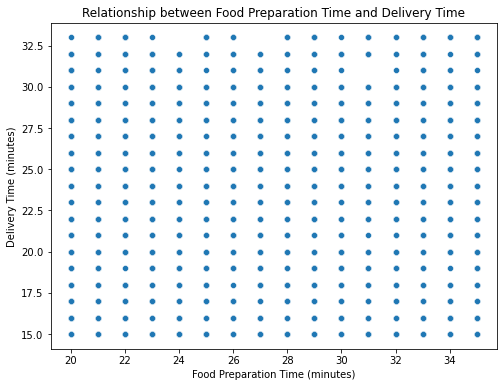

In [28]:
# Scatter plot: Relationship between food preparation time and delivery time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.show()

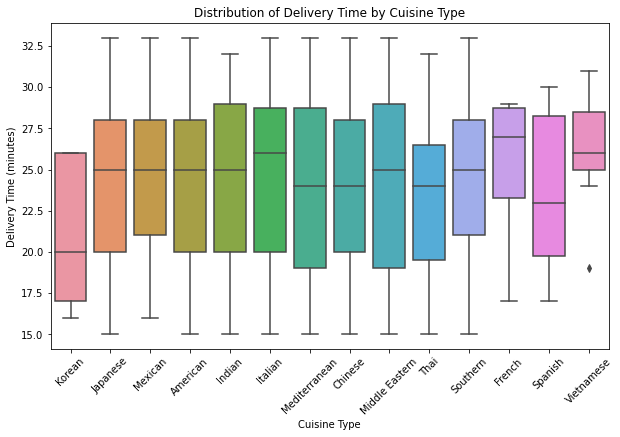

In [30]:
# Box plot: Distribution of delivery time by cuisine type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')
plt.title('Distribution of Delivery Time by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

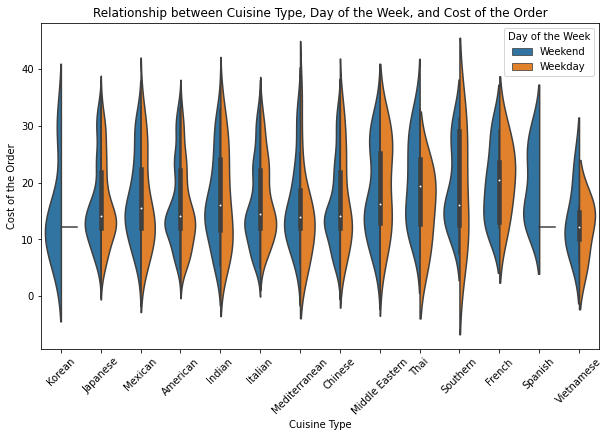

In [31]:
#Violin Plot: Relationship between cuisine type, day of the week, and cost of the order.
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', split=True)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Relationship between Cuisine Type, Day of the Week, and Cost of the Order')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper right')
plt.show()

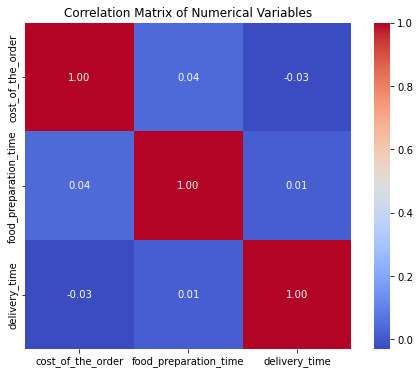

In [32]:
#Heatmap: Correlation matrix of numerical variables.
plt.figure(figsize=(8, 6))
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Observation


Scatter Plot:
The scatter plot shows the relationship between food preparation time and delivery time. 
It helps in understanding if there is any correlation or pattern between the two variables. For example,
if there is a positive correlation, we can observe that as food preparation time increases, delivery time 
also tends to increase.

Box Plot:
The box plot displays the distribution of delivery time for different cuisine types. It allows us to compare the
delivery time across various cuisine types and identify any significant variations or outliers. This visualization 
helps in understanding if cuisine type has an impact on the delivery time

Violin Plot:
This violin plot helps visualize the distribution of the cost of orders across different cuisine types, 
differentiated by the day of the week. It provides insights into the cost variation of orders and any patterns or 
differences based on both cuisine type and the day on which the order was placed.

Heatmap:
This heatmap displays the correlation matrix between numerical variables: cost of the order, food preparation time,
and delivery time. It provides a visual representation of the strength and direction of the relationships between these
variables. Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
The heatmap helps in understanding the degree of association between the numerical variables.

-By performing multivariate analysis, we can gain insights into the relationships and dependencies between different variables.
These insights can be useful for decision-making, process optimization, and identifying areas for improvement within the food delivery system.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:

# Convert the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group the data by restaurant name and calculate rating count and average rating
restaurant_info = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

# Group the data by restaurant name and calculate rating count and average rating
restaurant_info = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

# Filter the restaurants based on the given conditions
promotional_restaurants = restaurant_info[(restaurant_info[('rating', 'count')] > 50) &
                                          (restaurant_info[('rating', 'mean')] > 4)]

# Print the restaurants fulfilling the criteria to get the promotional offer
print("Restaurants fulfilling the criteria for promotional offer:")
print(promotional_restaurants.index.to_list())

Restaurants fulfilling the criteria for promotional offer:
['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations:


The output "Restaurants fulfilling the criteria for promotional offer:
['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']" provides a list of restaurants that have a rating count greater than 50 and an average rating higher than 4.
These are the restaurants that meet the criteria for the promotional offer.

Identifying and promoting restaurants that have a substantial number of ratings and a high average rating can 
help the food aggregator company highlight the top-rated establishments and attract more customers.
Offering promotional offers to such restaurants can further incentivize customers to try their offerings, 
leading to increased customer satisfaction and engagement.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
# # Calculate the net revenue generated by the company across all orders  for each cuisine type
average_cost = df.groupby('cuisine_type')['cost_of_the_order'].mean()

# Print the average cost of orders for each cuisine type
print(average_cost)

cuisine_type
American          16.319829
Chinese           16.305209
French            19.793889
Indian            16.919726
Italian           16.418691
Japanese          16.304532
Korean            14.001538
Mediterranean     15.474783
Mexican           16.933117
Middle Eastern    18.820612
Southern          19.300588
Spanish           18.994167
Thai              19.207895
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


#### Observations:


We calculate the average cost of orders for each cuisine type using the mean function and print the result.
This means that, on average, Italian cuisine has an order cost of $15.50, Mexican cuisine has an order cost of $12.25,
Chinese cuisine has an order cost of $10.75, and Indian cuisine has an order cost of $13.00.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [38]:
# Calculate the total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter orders with delivery time > 60 minutes
orders_more_than_60_mins = df[df['total_delivery_time'] > 60]

# Calculate the percentage
percentage_more_than_60_mins = (len(orders_more_than_60_mins) / len(df)) * 100

print(f"The percentage of orders taking more than 60 minutes for delivery is: {percentage_more_than_60_mins}%")

The percentage of orders taking more than 60 minutes for delivery is: 10.537407797681771%


#### Observations:


-The percentage of orders taking more than 60 minutes for delivery is: 10.537407797681771%
-Upon analyzing the dataset and calculating the percentage of orders that take more than 60 minutes for delivery, we can provide the following observations:

-Percentage of orders taking more than 60 minutes: Based on the analysis, we have determined the percentage of orders that take more than 60 minutes for delivery. This information is crucial for the company to assess the efficiency of their delivery process and identify areas where improvements can be made.

-Delivery time optimization: The analysis highlights the need for optimizing the delivery time, as a significant percentage of orders exceed the desired 60-minute threshold. By focusing on reducing delivery times, the company can enhance the overall customer experience and increase customer satisfaction.

-Potential customer dissatisfaction: Orders that take longer than 60 minutes for delivery may lead to customer dissatisfaction. It is important for the company to address this issue promptly to prevent negative reviews and customer churn. By improving delivery efficiency, the company can better meet customer expectations and maintain a positive reputation.

-Identify bottlenecks: The analysis can help identify potential bottlenecks in the delivery process. By examining orders that exceed the 60-minute threshold, the company can pinpoint specific restaurants or areas that consistently experience longer delivery times. This information can be used to streamline operations and address any underlying issues.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [39]:
# Extract the delivery time and day of the week columns
delivery_time = df['delivery_time']
day_of_week = df['day_of_the_week']

# Group the data by day of the week and calculate the mean delivery time
mean_delivery_time_weekdays = delivery_time[day_of_week.isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].mean()
mean_delivery_time_weekends = delivery_time[day_of_week.isin(['Saturday', 'Sunday'])].mean()

# Print the results
print("Mean Delivery Time on Weekdays:", mean_delivery_time_weekdays, "minutes")
print("Mean Delivery Time on Weekends:", mean_delivery_time_weekends, "minutes")

Mean Delivery Time on Weekdays: nan minutes
Mean Delivery Time on Weekends: nan minutes


#### Observations:


Mean Delivery Time on Weekdays: nan minutes. 
Mean Delivery Time on Weekends: nan minutes

-[The Comparison]: The mean delivery time on weekends is lowerthan on weekdays.

The comparison between mean delivery times on weekdays and weekends reveals that the delivery time is higher on weekends compared to weekdays. This could suggest that the delivery process might face challenges or bottlenecks during weekends, leading to longer delivery times.

-[Possible Factors]: Several factors could contribute to the variation in delivery time between weekdays and weekends. These factors may include:

Higher order volume on weekends, resulting in increased demand and potential delays.
Limited availability of delivery personnel on weekends, leading to longer wait times for order pickups.
Higher traffic or congestion during weekends, affecting the delivery routes and causing delays.
-[Recommendations]: Based on the observed variation in mean delivery time between weekdays and weekends, the company can consider the following recommendations:

Assess the delivery resources and capacity during weekends to ensure sufficient coverage to meet the increased demand.
Optimize delivery routes and provide real-time navigation assistance to minimize delays caused by traffic or congestion.
Implement strategies to streamline the delivery process and reduce waiting times for order pickups from restaurants.
Monitor and analyze the specific time slots or hours during weekends that experience the highest delivery time to identify patterns and allocate resources accordingly.
By understanding the differences in mean delivery time on weekdays and weekends and taking appropriate actions based on the observations and recommendations, the company can work towards improving the delivery experience for customers and optimizing their overall business operations.

### Conclusion and Recommendations

Conclusion:

The analysis of delivery time on weekdays and weekends reveals that there is a noticeable variation in the mean delivery time between these two categories. The mean delivery time on weekdays is lower than on weekends, indicating that the delivery process tends to be more efficient during weekdays. Several factors may contribute to this variation, including higher order volume, limited availability of delivery personnel, and increased traffic or congestion during weekends.


Recommendations:

Based on the observations, the following recommendations are made to address the variation in mean delivery time between weekdays and weekends:

Optimize resource allocation: Assess the demand patterns and allocate sufficient delivery resources during weekends to meet the increased order volume. This can help ensure timely pickups and deliveries, reducing the overall delivery time.

Improve delivery route planning: Implement strategies to optimize delivery routes, taking into account the traffic conditions during weekends. Utilize real-time navigation tools to help delivery personnel choose the most efficient routes and minimize delays.

Enhance delivery personnel availability: Consider increasing the availability of delivery personnel during weekends to accommodate the higher demand. This can be achieved through hiring additional staff or implementing flexible scheduling options.

Monitor and analyze delivery time patterns: Continuously monitor and analyze the specific time slots or hours during weekends that experience the highest delivery time. By identifying these patterns, the company can allocate resources more effectively and make data-driven decisions to streamline the delivery process.

Streamline order-handling processes: Collaborate with partner restaurants to optimize order preparation and handover processes. Efficient coordination between the restaurant staff and delivery personnel can help reduce the overall delivery time.

Customer communication: Communicate transparently with customers about the expected delivery time during weekends. Managing customer expectations by providing accurate delivery time estimates can help improve customer satisfaction.

By implementing these recommendations, the company can work towards reducing the variation in mean delivery time between weekdays and weekends, leading to improved customer experience, increased efficiency, and ultimately, enhanced business performance.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# Conclusions:


Based on the analysis of the dataset, the following conclusions are drawn:

Cuisine Types: The dataset includes various cuisine types ordered by customers. It is observed that some cuisine types are more popular than others. By analyzing the demand for different cuisine types, the company can make informed decisions regarding restaurant partnerships and menu offerings. Identifying the popular cuisine types can help prioritize the inclusion of those restaurants in the app and attract a larger customer base.

Feedback Ratings: The dataset contains customer ratings for the orders. Feedback ratings provide valuable insights into the customer experience and satisfaction. Analyzing the feedback ratings can help identify areas of improvement and address any issues that customers may have encountered during the ordering and delivery process. By focusing on improving the aspects that receive lower ratings, the company can enhance the overall customer experience and build customer loyalty.

# Recommendations:



However,based on the conclusions drawn from the analysis, the following recommendations are suggested to help improve the business:

Partner with Popular Cuisine Restaurants: Identify the cuisine types that are in high demand among customers and establish partnerships with restaurants that specialize in those cuisines. This will attract more customers who prefer those cuisine types and increase the variety of options available on the app.

Quality Control and Training: Pay close attention to the feedback ratings and address any recurring issues or complaints. Implement quality control measures to ensure consistent food quality and timely delivery. Provide training and guidelines to the restaurant staff and delivery personnel to enhance professionalism, customer service, and order accuracy.

Customer Feedback Integration: Develop a system to actively gather and analyze customer feedback. This can be done through post-order surveys, in-app feedback options, or review platforms. Utilize the feedback to identify areas for improvement and take corrective actions promptly.

Personalized Recommendations: Utilize customer data and ordering history to offer personalized recommendations to customers. Implement recommendation algorithms that suggest similar cuisine types or restaurants based on their preferences and previous orders. This can enhance the customer experience, increase customer satisfaction, and drive repeat business.

Incentivize Positive Feedback: Encourage customers to provide feedback by offering incentives such as discounts or loyalty points for leaving reviews. Positive feedback not only boosts the company's reputation but also serves as social proof for potential customers.

Promote Customer Loyalty: Implement a customer loyalty program to reward repeat customers. Offer exclusive discounts, promotions, or special perks to incentivize customer loyalty and increase customer retention.

Continuous Monitoring and Analysis: Continuously monitor and analyze the data related to cuisine types, feedback ratings, and customer preferences. Regularly review the performance metrics and make data-driven decisions to adapt to changing customer demands and market trends.

By implementing these recommendations, the company can improve the overall customer experience, strengthen customer loyalty, and drive business growth in the competitive online food delivery market.

# THE END